In [55]:
import pandas as pd
import numpy as np
import seaborn as sns

In [56]:
# titanic_df 라는 이름으로 data/titanic.csv 불러오기
titanic_df = pd.read_csv('/aiffel/data/titanic.csv')

In [57]:
# 상위 15줄의 데이터 확인하기
titanic_df.head(15)

,Pclass,Name,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,S,1,1912-03-28
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0,1912-04-03
5,3,"Moran, Mr. James",male,28.0,0,0,330877,Q,0,1912-03-30
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,S,0,1912-03-14
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,S,0,1912-03-14
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,S,1,1912-01-30
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,C,1,1912-03-04


In [58]:
# info 펑션으로 데이터 변수들 살펴보기
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       885 non-null    int64  
 1   Name         885 non-null    object 
 2   Gendr        885 non-null    object 
 3   Age          879 non-null    float64
 4   SibSp        885 non-null    int64  
 5   Parch        885 non-null    int64  
 6   Ticket       885 non-null    object 
 7   Embarked     883 non-null    object 
 8   Survived     885 non-null    int64  
 9   ticket_date  885 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 69.3+ KB


In [59]:
# describe로 데이터의 통계적 정보 확인하기
titanic_df.describe()

,Pclass,Age,SibSp,Parch,Survived
count,885.000000,879.000000,885.000000,885.000000,885.000000
mean,2.311864,29.679181,0.525424,0.377401,0.377401
std,0.836069,13.559664,1.109746,0.805768,0.485011
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,145.000000,8.000000,6.000000,1.000000


In [60]:
# 컬럼별 결측치 - 비율 확인하기 "mean()" 메소드를 써줘야함!
titanic_df.isna().mean()

Pclass         0.00000
Name           0.00000
Gendr          0.00000
Age            0.00678
SibSp          0.00000
Parch          0.00000
Ticket         0.00000
Embarked       0.00226
Survived       0.00000
ticket_date    0.00000
dtype: float64

In [61]:
# Age 컬럼의 결측치를 평균(mean) 으로 채우기
titanic_df['Age'].fillna(titanic_df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      29.679181
4      35.000000
         ...    
880    27.000000
881    19.000000
882    28.000000
883    26.000000
884    32.000000
Name: Age, Length: 885, dtype: float64

In [62]:
# 덮어쓰기
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [63]:
# Embarked 컬럼의 결측치를 'S'로 채우기
titanic_df['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
880    S
881    S
882    S
883    C
884    Q
Name: Embarked, Length: 885, dtype: object

In [64]:
# 덮어쓰기
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

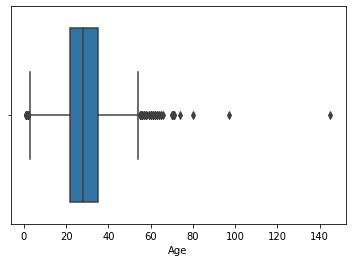

In [65]:
# Age 컬럼의 아웃라이어를 확인하기 위해, Box Plot 그리기
sns.boxplot(titanic_df['Age'])

<AxesSubplot:ylabel='Age'>

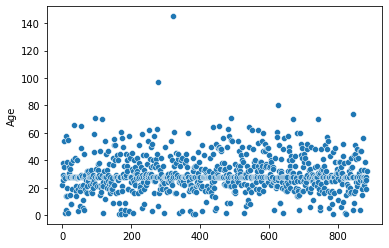

In [66]:
# Age 컬럼의 아웃라이어를 확인하기 위해, Scatter Plot 그리기 (x축은 인덱스로 설정)
sns.scatterplot(x = titanic_df.index, y = titanic_df['Age'])

In [67]:
# Age 컬럼에서 100 이상의 데이터 포인트(데이터 행) 제거하기
titanic_df = titanic_df[titanic_df['Age'] < 100]

In [68]:
titanic_df['Age']

0      22.000000
1      38.000000
2      26.000000
3      29.679181
4      35.000000
         ...    
880    27.000000
881    19.000000
882    28.000000
883    26.000000
884    32.000000
Name: Age, Length: 884, dtype: float64

In [69]:
titanic_df['Age'].sort_values()

785     1.0
182     1.0
171     1.0
379     1.0
163     1.0
       ... 
95     71.0
490    71.0
845    74.0
627    80.0
279    97.0
Name: Age, Length: 884, dtype: float64

In [74]:
# 변수 이름 "Gendr"를 "Gender"로 변경하기
titanic_df = titanic_df.rename({'Gendr': 'Gender'}, axis = 1)

In [75]:
titanic_df.head()

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,S,0,1912-01-12
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,C,1,1912-03-29
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29.679181,1,0,113803,S,1,1912-03-28
4,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,S,0,1912-04-03


In [77]:
# Gender 변수의 male을 'M'으로, female을 'F'로 변경하기
titanic_df['Gender'] = titanic_df['Gender'].replace({'male': 'M', 'female': 'F'})

In [79]:
titanic_df.head()

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,"Braund, Mr. Owen Harris",M,22.000000,1,0,A/5 21171,S,0,1912-01-12
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.000000,1,0,PC 17599,C,1,1912-03-29
2,3,"Heikkinen, Miss. Laina",F,26.000000,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,29.679181,1,0,113803,S,1,1912-03-28
4,3,"Allen, Mr. William Henry",M,35.000000,0,0,373450,S,0,1912-04-03


In [84]:
# Ticket 변수를 띄어쓰기 기준으로 분류하고, 가장 앞부분을 "ticket_head" 라는 이름의 변수로 저장하기
titanic_df['ticket_head'] = titanic_df['Ticket'].str.split().str[0]

In [86]:
titanic_df['ticket_head'] = titanic_df['Ticket'].str.split(expand = True)[0]

In [87]:
titanic_df

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,ticket_head
0,3,"Braund, Mr. Owen Harris",M,22.000000,1,0,A/5 21171,S,0,1912-01-12,A/5
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.000000,1,0,PC 17599,C,1,1912-03-29,PC
2,3,"Heikkinen, Miss. Laina",F,26.000000,0,0,STON/O2. 3101282,S,1,1912-02-23,STON/O2.
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,29.679181,1,0,113803,S,1,1912-03-28,113803
4,3,"Allen, Mr. William Henry",M,35.000000,0,0,373450,S,0,1912-04-03,373450
...,...,...,...,...,...,...,...,...,...,...,...
880,2,"Montvila, Rev. Juozas",M,27.000000,0,0,211536,S,0,1912-01-29,211536
881,1,"Graham, Miss. Margaret Edith",F,19.000000,0,0,112053,S,1,1912-03-30,112053
882,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,28.000000,1,2,W./C. 6607,S,0,1912-04-07,W./C.
883,1,"Behr, Mr. Karl Howell",M,26.000000,0,0,111369,C,1,1912-03-01,111369


In [89]:
# ticket_head 변수를 소문자로 변경하기
titanic_df['ticket_head'] = titanic_df['ticket_head'].str.lower()

In [90]:
titanic_df.head()

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,ticket_head
0,3,"Braund, Mr. Owen Harris",M,22.000000,1,0,A/5 21171,S,0,1912-01-12,a/5
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.000000,1,0,PC 17599,C,1,1912-03-29,pc
2,3,"Heikkinen, Miss. Laina",F,26.000000,0,0,STON/O2. 3101282,S,1,1912-02-23,ston/o2.
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,29.679181,1,0,113803,S,1,1912-03-28,113803
4,3,"Allen, Mr. William Henry",M,35.000000,0,0,373450,S,0,1912-04-03,373450


In [91]:
# ticket_date 변수의 데이터 타입을 datetime으로 변경하기
titanic_df['ticket_date'] = pd.to_datetime(titanic_df['ticket_date'])

In [92]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 884
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Pclass       884 non-null    int64         
 1   Name         884 non-null    object        
 2   Gender       884 non-null    object        
 3   Age          884 non-null    float64       
 4   SibSp        884 non-null    int64         
 5   Parch        884 non-null    int64         
 6   Ticket       884 non-null    object        
 7   Embarked     884 non-null    object        
 8   Survived     884 non-null    int64         
 9   ticket_date  884 non-null    datetime64[ns]
 10  ticket_head  884 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 115.2+ KB


In [94]:
# ticket_date 변수에서 year 값을 추출하여 'ticket_year' 컬럼으로 저장하기
titanic_df['ticket_year'] = pd.to_datetime(titanic_df['ticket_date']).dt.year

In [95]:
titanic_df['ticket_year']

0      1912
1      1912
2      1912
3      1912
4      1912
       ... 
880    1912
881    1912
882    1912
883    1912
884    1912
Name: ticket_year, Length: 884, dtype: int64